In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime, time

# Load the data
data = pd.read_csv('UberDataset.csv')
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
data.shape

(1156, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
data['PURPOSE'].isna().sum()

503

In [6]:
# Fill the missing values with 'Not Available'
data['PURPOSE'].fillna('Not Available', inplace=True)

In [7]:
# Check the purpose column again to see if the missing values are filled
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
# view the row with missing values
data[data['END_DATE'].isna()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,Not Available


In [9]:
# drop all the rows with missing values
data.dropna(inplace=True)

In [10]:
data[data.isna()].count()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
# We can see one row is removed
data.shape

(1154, 7)

In [13]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'])
data['END_DATE'] = pd.to_datetime(data['END_DATE'])

In [14]:
def bin_time(x):
    if x < time(4, 0, 0):
        return 'Late Night'
    elif x < time(12, 0, 0):
        return 'Morning'
    elif x < time(18, 0, 0):
        return 'Afternoon'
    elif x < time(21, 0, 0):
        return 'Evening'
    else:   
        return 'Night'

data['TIME_OF_DAY'] = data['START_DATE'].dt.time.apply(bin_time)
data.insert(1, 'TIME_OF_DAY', data.pop('TIME_OF_DAY'))
data

,START_DATE,TIME_OF_DAY,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,Night,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,Late Night,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available
2,2016-01-02 20:25:00,Evening,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,Afternoon,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,Afternoon,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,Late Night,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,Afternoon,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,Afternoon,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,Night,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [15]:
obj_cols = data.select_dtypes(include='object').columns

# Count the number of unique values in each object column 
for idx, col in enumerate(obj_cols):
    unique_vals = data[col].unique().size
    print(f"{col}: {unique_vals}")

TIME_OF_DAY: 5
CATEGORY: 2
START: 177
STOP: 188
PURPOSE: 11


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meeting'),
  Text(1, 0, 'Meal/Entertain'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Moving'),
  Text(7, 0, 'Airport/Travel'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Charity ($)')])

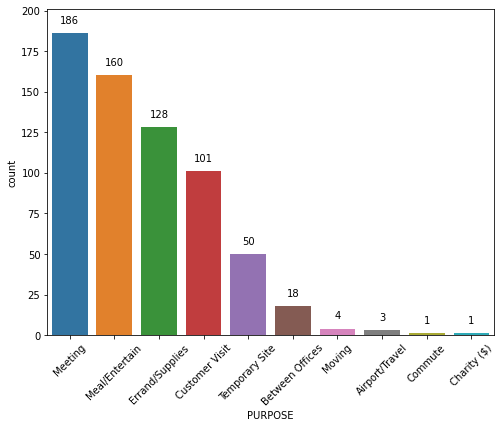

In [16]:
# get just the PURPOSE column and filter out the 'Not Available' rows
purpose = pd.DataFrame(data['PURPOSE'])
purpose = purpose[purpose['PURPOSE'] != 'Not Available'].reset_index(drop=True)

# plot the count of the purpose for each trip
plt.figure(figsize=(8, 6))
sns.countplot(x = 'PURPOSE', data = purpose, order = purpose['PURPOSE'].value_counts().index)

# reference: https://stackoverflow.com/questions/39444665/add-data-labels-to-seaborn-factor-plot

def add_data_labels(data_col, text_buffer, y_axis_buffer):
    # get the current axis of the plot
    ax = plt.gca()

    # set the y-axis range
    ax.set_ylim([0, data_col.value_counts().max() + y_axis_buffer])

    # iterate over the bars and add the data labels
    for i, bar in enumerate(ax.patches):
        h = bar.get_height()
        ax.text(
            i, # bar index (x coordinate of text)
            h+text_buffer, # y coordinate of text
            '{}'.format(int(h)),  # y label
            ha='center', 
            va='center', 
            size=10)
        
add_data_labels(data_col=purpose['PURPOSE'], text_buffer=8, y_axis_buffer=15)

# rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

As evidenced above, people mostly travelled for a meeting or for a meal/entertainment. Very few people used an Uber for aiport travel, commute, or charity.

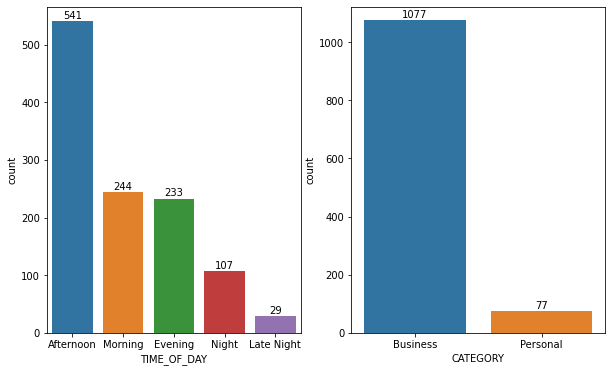

In [17]:
plt.figure(figsize=(10, 6))

# on the left plot, plot the count of trips per each time of day
plt.subplot(1, 2, 1)
sns.countplot(x = 'TIME_OF_DAY', data = data, order = data['TIME_OF_DAY'].value_counts().index)
add_data_labels(data_col=data['TIME_OF_DAY'], text_buffer=10, y_axis_buffer=25)

# on the right plot, plot the count of trips per each category
plt.subplot(1, 2, 2)
sns.countplot(x = 'CATEGORY', data = data, order = data['CATEGORY'].value_counts().index)
add_data_labels(data_col=data['CATEGORY'], text_buffer=17, y_axis_buffer=45)

plt.show()

In terms of the time of day, the afternoon (between 12:00 and 17:59) was the most popular time to ride an Uber.
Morning (4:00 to 11:59) and evening times were pretty evenly matched, while late night hours (midnight till 3:59) were least popular.

In terms of category, the overwhelming majority of rides were for business purposes. Only 77 out of the 1154 rides in the dataset were used for personal reasons.

Now, let's look at the Uber trips by their categories and respective purposes.

In [18]:
# reference to Plotly documentation: https://plotly.com/python/sunburst-charts/
import plotly.express as px
fig = px.sunburst(data, path=['CATEGORY', 'PURPOSE'], title='Uber Trips by Category and Purpose')
fig.show()

In the graph above, we can see that out of all business trips, 431 were labelled as "Not Available."
For all personal trips, the number was 71.

In response to this, let's filter out the 'Not Available' rows, view the counts by pairs of category-purpose, and revisit our sunburst chart.

In [19]:
category_and_purpose = pd.DataFrame(data[['CATEGORY', 'PURPOSE']])
category_and_purpose = category_and_purpose[category_and_purpose['PURPOSE'] != 'Not Available'].reset_index(drop=True)

# Check the count for each category and purpose pairs
category_and_purpose.groupby(['CATEGORY', 'PURPOSE']).size().reset_index(name='COUNT')

,CATEGORY,PURPOSE,COUNT
0,Business,Airport/Travel,3
1,Business,Between Offices,18
2,Business,Customer Visit,101
3,Business,Errand/Supplies,128
4,Business,Meal/Entertain,160
5,Business,Meeting,186
6,Business,Temporary Site,50
7,Personal,Charity ($),1
8,Personal,Commute,1
9,Personal,Moving,4


In [20]:
fig = px.sunburst(category_and_purpose, path=['CATEGORY', 'PURPOSE'], title='Uber Trips by Category and Purpose (Updated)')
fig.show()

After updating the sunburst chart, it's overwhelmingly clear how dominant business trips were compared to personal ones.

Moving on, let's explore the 'MILES' column with a box plot to view the distribution of miles travelled.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.



<AxesSubplot:xlabel='MILES'>

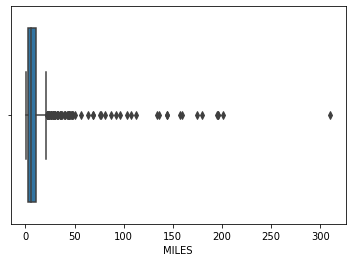

In [21]:
sns.boxplot(data['MILES'], orient='v')

In [22]:
Q1 = data['MILES'].quantile(0.25)
Q3 = data['MILES'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = round(Q3 + 1.5 * IQR, 1)
median = data['MILES'].median()
mean = data['MILES'].mean()
min_miles = round(data['MILES'].min(), 1)
max_miles = round(data['MILES'].max(), 1)

print(f"""
Min: {min_miles}
Max: {max_miles}
Mean: {round(mean, 1)}
Median: {median}
Lower Bound: {lower_bound}
Q1: {Q1}
IQR: {IQR}
Q3: {Q3}
Upper Bound: {upper_bound}
""")


Min: 0.5
Max: 310.3
Mean: 10.6
Median: 6.0
Lower Bound: 0
Q1: 2.9
IQR: 7.5
Q3: 10.4
Upper Bound: 21.6



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='MILES'>

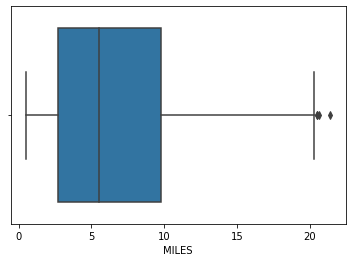

In [23]:
# Redraw the boxplot with the outliers removed
sns.boxplot(data[data['MILES'] <= upper_bound]['MILES'])

Let's show this data again with a histogram.

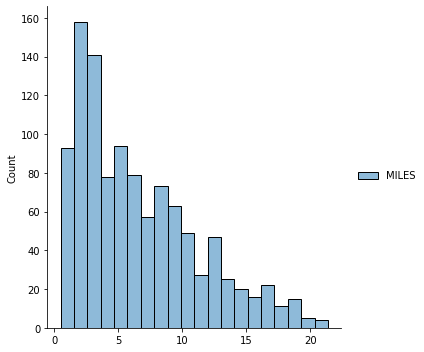

In [24]:
sns.displot(data[data['MILES'] <= upper_bound], bins=20, kde=False)

The histogram shows up as being right-skewed. Most of the trips were booked for distances within 2 to 3 miles, with the number of rides tapering off after 5 miles.

On the outliers side, we can see that the bulk of the trips were made within 21.7 and 50 miles, as evidenced in the histogram below.

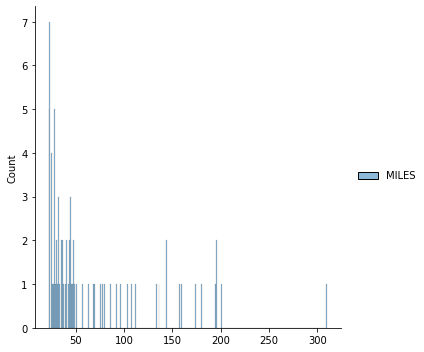

In [25]:
sns.displot(data[(data['MILES'] > upper_bound)], bins=round(max_miles-upper_bound), kde=False)

Within this range, only the 22 and 23 mile trips had 5 or more riders.

For all other trips between 24 and 50 miles, we can expect 3 or fewer riders.

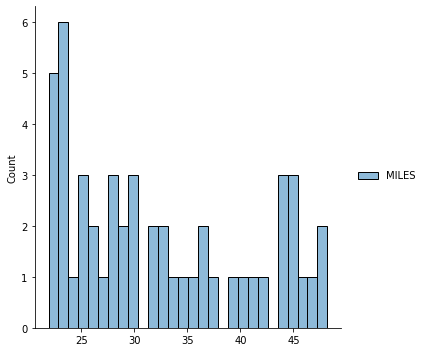

In [26]:
sns.displot(data[(data['MILES'] > upper_bound) & (data['MILES'] <= 50)], bins=round(50 - upper_bound), kde=False)

Moving on to the "START" and "STOP" columns, let's find out how many trips had the same starts and ends.

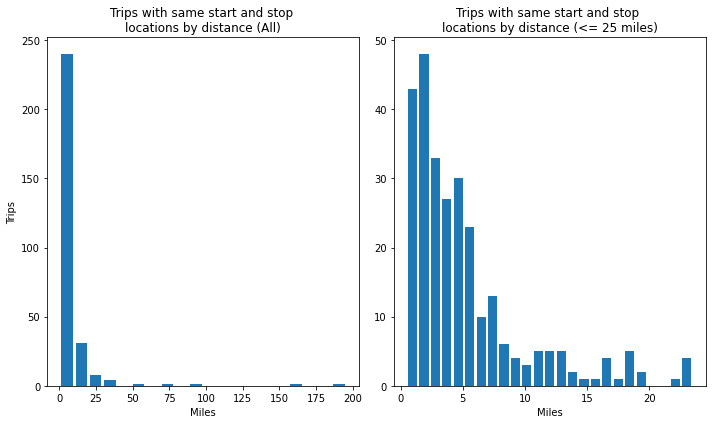

In [35]:
same_dest = pd.DataFrame(data[data['START'] == data['STOP']]).reset_index(drop=True)
# 288 trips had the same start and stop location.
len(same_dest)

def show_same_start_and_end(data):
    df0 = pd.DataFrame(data['MILES'])
    df1 = df0[df0['MILES'] <= 25]

    fig, axes = plt.subplots(1, 2, figsize=(10, 6))

    # Plot the histogram for all the trips with the same start and stop location
    axes[0].hist(df0, bins=20, histtype='barstacked', rwidth=0.8)
    axes[0].set_title('Trips with same start and stop \nlocations by distance (All)')
    axes[0].set_xlabel('Miles')
    axes[0].set_ylabel('Trips')

    # Plot the histogram for all the trips with the same start and stop location, but only for trips <= 25 miles
    axes[1].hist(df1, bins=25, histtype='barstacked', rwidth=0.8)
    axes[1].set_title('Trips with same start and stop \nlocations by distance (<= 25 miles)')
    axes[1].set_xlabel('Miles')

    fig.tight_layout()
    plt.show()

show_same_start_and_end(same_dest)

On the graph to the left, we can see very few trips that lasted 25 miles or more, so let's find out what those trips were like.

In [38]:
same_dest[same_dest['MILES'] > 25]

,START_DATE,TIME_OF_DAY,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
90,2016-08-15 19:08:00,Evening,2016-08-15 20:30:00,Business,Unknown Location,Unknown Location,25.9,Temporary Site
113,2016-08-24 12:05:00,Afternoon,2016-08-24 12:56:00,Business,Unknown Location,Unknown Location,25.2,Not Available
114,2016-08-24 13:01:00,Afternoon,2016-08-24 15:25:00,Business,Unknown Location,Unknown Location,96.2,Not Available
115,2016-08-25 15:17:00,Afternoon,2016-08-25 16:22:00,Business,Unknown Location,Unknown Location,35.0,Not Available
117,2016-08-25 17:19:00,Afternoon,2016-08-25 19:20:00,Business,Unknown Location,Unknown Location,50.4,Not Available
126,2016-08-27 16:15:00,Afternoon,2016-08-27 19:13:00,Business,Unknown Location,Unknown Location,156.9,Not Available
136,2016-09-06 17:49:00,Afternoon,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,69.1,Not Available
153,2016-09-27 21:01:00,Night,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,Not Available
154,2016-09-30 17:39:00,Afternoon,2016-09-30 20:20:00,Business,Islamabad,Islamabad,37.7,Not Available
157,2016-10-04 09:50:00,Morning,2016-10-04 10:52:00,Business,Unknown Location,Unknown Location,28.6,Not Available


As we can see here, there were 12 trips that fit our criteria, and only 2 trips where were without an unknown start/end. 

So, let's redraw the histograms above again and filter out the unknown locations.

In [34]:
same_dest_known = same_dest[same_dest['START'] != 'Unknown Location'].reset_index(drop=True)
same_dest_known

,START_DATE,TIME_OF_DAY,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,Night,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,Late Night,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available
2,2016-01-02 20:25:00,Evening,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,Afternoon,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 17:15:00,Afternoon,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...,...
197,2016-12-30 11:31:00,Morning,2016-12-30 11:56:00,Business,Kar?chi,Kar?chi,2.9,Errand/Supplies
198,2016-12-30 15:41:00,Afternoon,2016-12-30 16:03:00,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies
199,2016-12-30 16:45:00,Afternoon,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4.6,Meeting
200,2016-12-30 23:06:00,Night,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit


Voila! Now there are 201 trips left (with 87 rows removed).

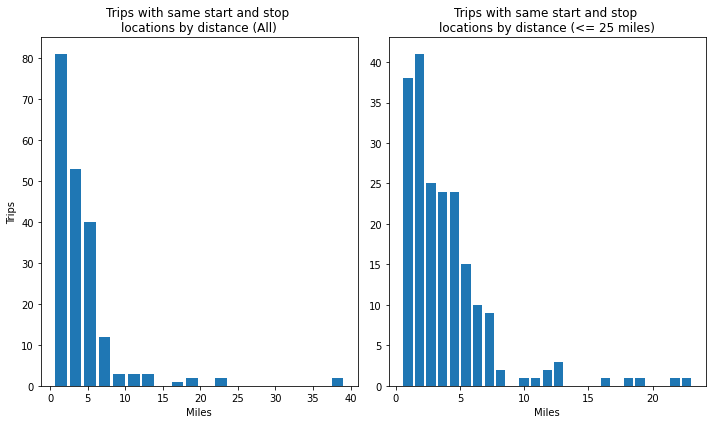

In [36]:
show_same_start_and_end(same_dest_known)

Around 79 of the 201 trips had a distance of 1 to 2 miles. And after 5-mile mark, the number of trips fell drastically.

For example, there were only 6 or 7 trips within 15 and 25 miles and 2 very long trip between 35 and 40 miles.

Out of curiosity, let's see all the trips made in descending order by the miles travelled.

In [37]:
same_dest_sorted = same_dest_known.sort_values(by='MILES', ascending=False)
same_dest_sorted

,START_DATE,TIME_OF_DAY,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
127,2016-11-20 10:27:00,Morning,2016-11-20 11:32:00,Business,Cary,Cary,39.2,Between Offices
97,2016-09-30 17:39:00,Afternoon,2016-09-30 20:20:00,Business,Islamabad,Islamabad,37.7,Not Available
35,2016-02-20 14:50:00,Afternoon,2016-02-20 15:54:00,Business,R?walpindi,R?walpindi,23.1,Meeting
6,2016-01-14 16:29:00,Afternoon,2016-01-14 17:05:00,Business,Houston,Houston,21.9,Customer Visit
155,2016-12-09 22:03:00,Night,2016-12-09 22:57:00,Business,Cary,Cary,18.9,Customer Visit
...,...,...,...,...,...,...,...,...
68,2016-07-05 16:48:00,Afternoon,2016-07-05 16:52:00,Business,Whitebridge,Whitebridge,0.6,Errand/Supplies
174,2016-12-24 22:04:00,Night,2016-12-24 22:09:00,Business,Lahore,Lahore,0.6,Errand/Supplies
175,2016-12-25 00:10:00,Late Night,2016-12-25 00:14:00,Business,Lahore,Lahore,0.6,Errand/Supplies
29,2016-02-17 16:38:00,Afternoon,2016-02-17 16:43:00,Business,Katunayaka,Katunayaka,0.5,Errand/Supplies


Now, let's check out the remaining trips without different start and end points.

In [28]:
diff_dest = pd.DataFrame(data[data['START'] != data['STOP']]).reset_index(drop=True)
fig = px.sunburst(diff_dest, path=['START', 'STOP'], title='Uber trips with different start and stop locations')
fig.show()

Cary is the most popular starting point, without folks travelling to Morrisville, Durham, and Raleigh, in that order.
Other prevalent beginnings were Morrisville and Whitesbridge, as well as some unknown locations.

What about destinations? Are there any differences?

In [46]:
stop_to_start = diff_dest.groupby(['STOP', 'START']).size().reset_index(name='COUNT')
fig = px.sunburst(stop_to_start, path=['STOP', 'START', 'COUNT'], title='Uber trips with by their destinations')
fig.show()

Apparently, yes!

Destinations were much more evenly distributed, with only 1 or 2 rides per destination.

The most popular destination was Whitebridge, with 19 rides arriving there, followed by Cary (12), Unknown Location (11), Berkeley (7), and Downtown (7).

Lastly, let's look at the distribution of rides with similar/different start and end points.

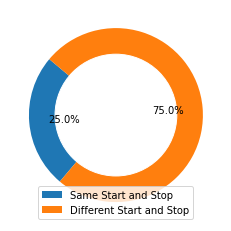

<Figure size 432x288 with 0 Axes>

In [29]:
# reference: https://python-graph-gallery.com/162-change-background-of-donut-plot/
plt.pie([same_dest.shape[0], diff_dest.shape[0]], 
        autopct='%1.1f%%',
        startangle=140)

plt.legend(labels=['Same Start and Stop', 'Different Start and Stop'], loc='lower center')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

fig = plt.figure()
fig.patch.set_facecolor='white'
plt.show()

Exactly a quarter of the rides travelled from and to the same areas, while the rest had different starts and ends.

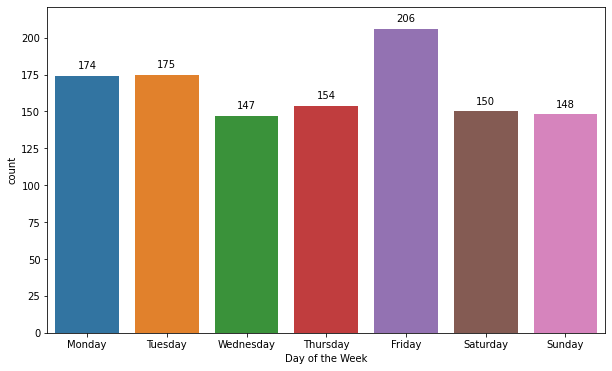

In [53]:
weekday = data['START_DATE'].dt.day_name()
plt.figure(figsize=(10, 6))
sns.countplot(x=weekday, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of the Week')
add_data_labels(data_col=weekday, text_buffer=7, y_axis_buffer=15)
plt.show()

For this dataset, Uber rides were most likely to occur on Fridays (206), followed by Monday and Tuesday on a neck-to-neck tie at 174 and 175, respectively.

In [68]:
# Process month data
month = data['START_DATE'].dt.month
df_month = month.value_counts().reset_index()
df_month.columns = ['Month Num', 'Count']
df_month['Month'] = df_month['Month Num'].apply(lambda x: datetime(1900, x, 1).strftime('%B'))
df_month = df_month.sort_values(by='Month Num').reset_index(drop=True)
df_month

,Month Num,Count,Month
0,1,61,January
1,2,115,February
2,3,113,March
3,4,54,April
4,5,49,May
5,6,107,June
6,7,112,July
7,8,133,August
8,9,36,September
9,10,106,October


Let's draw the line chart from our month data.

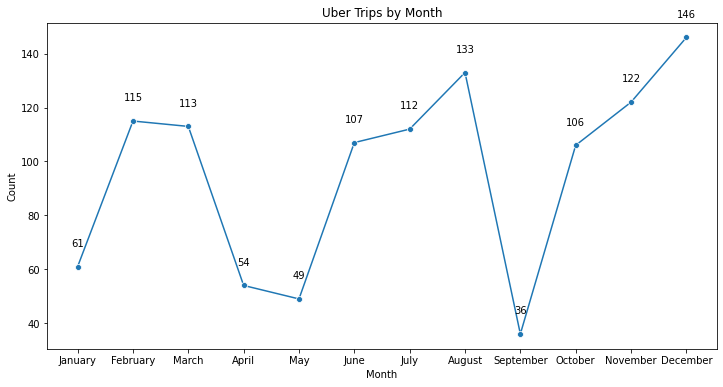

In [101]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_month, x='Month', y='Count', marker='o')

plt.title('Uber Trips by Month')

for x, y in zip(df_month['Month'], df_month['Count']):
    plt.text(x, y+9, y, fontsize=10, ha='center', va='center_baseline')

Uber rides peaked during December, with steady rises in ridership between June - August and October - December.

Along with this came significant drop offs in the months of September (36), May (49), April (54), and January (61), respectively.